In [2]:
# Import calibration functions
# Run this to reimport without having to restart the whole notebook
import radial_velocity_functions
import importlib
importlib.reload(radial_velocity_functions)
from radial_velocity_functions import *

In [20]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.size"] = 10 
matplotlib.rcParams['figure.dpi'] = 300

In [21]:
df = pd.read_csv("lily_stellar_activity_data/34411_activity.csv")
df

,File,Time [MJD],Epoch,SNR,CBC RV [m/s],CBC RV Err. [m/s],CCF RV [m/s],CCF RV Err. [m/s],S Value,H-alpha Emission,H-alpha Equiv. Width [A],CCF FWHM [m/s],CCF FWHM Err. [m/s],BIS [m/s],V_span [m/s],Bi-Gaussian [m/s],Skew Normal,Date Generated,Phot. GP [mag],Phot. GP Err. [mag]
0,34411_191008.1168.fits,58764.47491,5,215,3.332,0.324,66488.805,0.297,0.145,0.176,2.294,7378.092,19.515,-55.332,-51.139,2.284,-0.795,2020-12-22T04:17:19.061,0.0,0.00102
1,34411_191008.1169.fits,58764.47689,5,221,1.841,0.340,66487.339,0.288,0.145,0.172,2.308,7378.378,19.491,-57.696,-52.577,2.320,-0.005,2020-12-22T04:17:24.006,0.0,0.00102
2,34411_191008.1170.fits,58764.47882,5,221,4.660,0.314,66489.720,0.288,0.145,0.175,2.298,7376.641,19.563,-57.033,-51.584,2.311,-0.800,2020-12-22T04:17:29.108,0.0,0.00102
3,34411_191015.1178.fits,58771.41509,5,226,-1.227,0.345,66485.202,0.281,0.148,0.174,2.277,7376.055,19.501,-58.641,-54.241,2.411,-0.806,2020-12-22T04:17:34.418,0.0,0.00102
4,34411_191015.1179.fits,58771.41686,5,212,-1.571,0.327,66484.268,0.301,0.148,0.175,2.289,7376.300,19.486,-56.914,-54.092,2.394,-0.805,2020-12-22T04:17:39.257,0.0,0.00102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,34411_201126.1028.fits,59179.43392,5,218,-0.490,0.298,66483.936,0.296,0.142,0.172,2.287,7378.909,20.231,-61.174,-56.141,2.833,-0.823,2020-12-22T04:34:38.655,0.0,0.00102
184,34411_201126.1029.fits,59179.43535,5,217,-0.617,0.323,66483.070,0.297,0.142,0.173,2.278,7375.923,20.209,-61.507,-56.593,2.828,-0.824,2020-12-22T04:34:44.805,0.0,0.00102
185,34411_201127.1106.fits,59180.21478,5,217,0.875,0.315,66486.025,0.294,0.141,0.167,2.295,7377.015,20.180,-61.701,-55.990,2.833,-0.823,2020-12-22T04:34:51.156,0.0,0.00102
186,34411_201127.1107.fits,59180.22016,5,218,2.268,0.319,66485.818,0.293,0.141,0.172,2.287,7380.080,20.199,-62.738,-56.465,2.883,-0.828,2020-12-22T04:34:57.286,0.0,0.00102


2.431461495838361
2.431461495838361
1.7802233818777735
0.30260106382978663


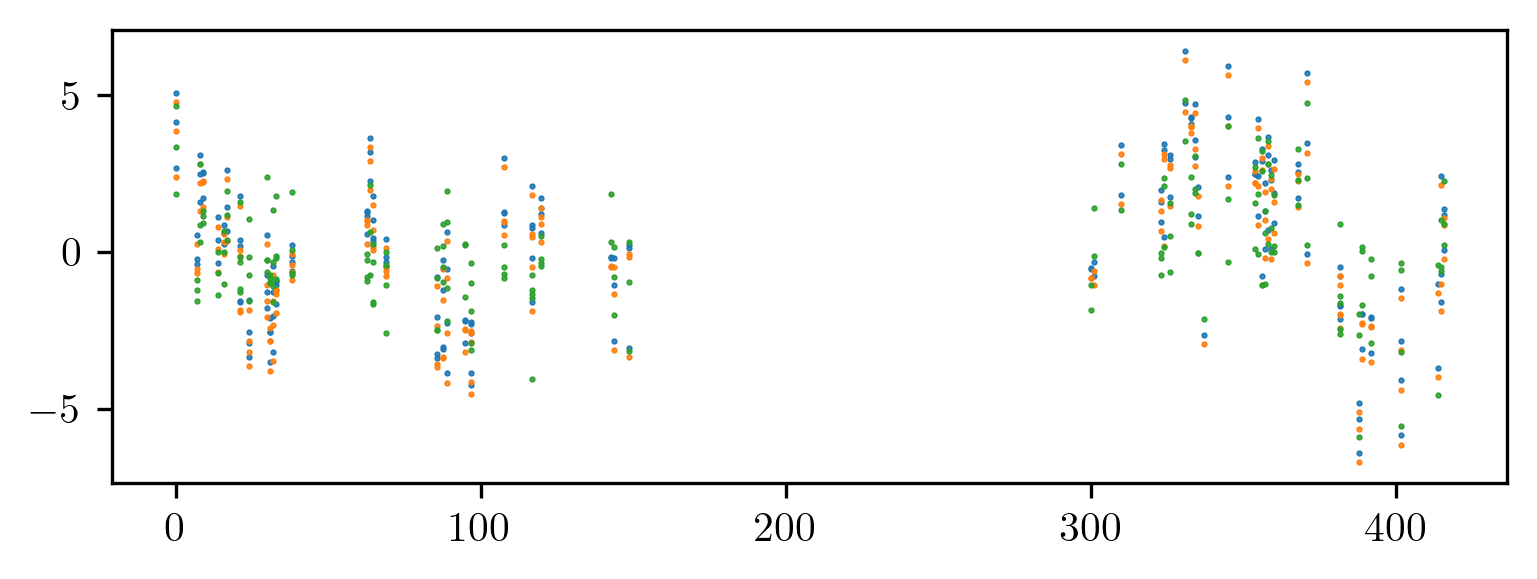

In [34]:

rv2 = df["CBC RV [m/s]"]
# rv_err = df["CBC RV Err. [m/s]"]
rv = df["CCF RV [m/s]"]
rv = rv - np.mean([min(rv), max(rv)])
rv_err = df["CCF RV Err. [m/s]"]
t = df["Time [MJD]"]
t = t - min(t)

# Center around zero
rv1 = rv - np.median(rv)

print(compute_rms(rv))
print(compute_rms(rv1))
print(compute_rms(rv2))
print(np.mean(rv_err))

plt.figure(figsize=(6,2))
plt.plot(t, rv, ".", ms=1)
plt.plot(t, rv1, ".", ms=1)
plt.plot(t, rv2, ".", ms=1)
